In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
# generate some house size between 100 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)

In [6]:
# generate house prics from house sizes witha random noise added.
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=2000, high=70000, size=num_house)

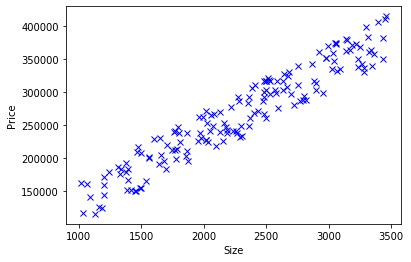

In [7]:
# plot generated house and size
plt.plot(house_size, house_price, 'bx')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [11]:
# normalizing the data
def normalize(array):
    return (array - array.mean()) / array.std()
# define number of training samples, 0.7 for training

num_train_samples = math.floor(num_house * 0.7)

# define training data
train_data_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_data_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

# define tensorflow placeholders
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

# define the variables holding the factors
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

# define the loss function to calc mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)

# optimizer learning rate
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
# initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    display_every = 2
    num_training_iter = 50
    
#     keep iterating the training data
    for iteration in range(num_training_iter):
        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
            
        # display current status
        if(iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print("Iteration #:, '%04d'" %(iteration +1), "cost=", "{:.9f}".format(c), "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
    print("Oprimization finished")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), "\n")
    
    train_house_size_std = train_data_size.std()
    train_house_size_mean = train_data_size.mean()
    train_price_std = train_price.std()
    train_price_mean = train_price.mean()
    
#     plot the graph
plt.rcParams["figure.figsize"] = (10, 0)
plt.figure()
plt.ylabel("Price")
plt.xlabel("Size (sq.ft)")
plt.plot(train_data_size, train_price, 'go', label='Training Data')
plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
        (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * tf_price_std + tf_price_mean,
        label="Learned Regression")
plt.legend(loc="upper left")
plt.show()

Iteration #:, '0002' cost= 0.359742254 size_factor= 1.7569684 price_offset= 0.06626437
Iteration #:, '0004' cost= 0.254053235 size_factor= 1.6121945 price_offset= 0.05422457
Iteration #:, '0006' cost= 0.183251157 size_factor= 1.4936936 price_offset= 0.044367913
Iteration #:, '0008' cost= 0.135821626 size_factor= 1.3966984 price_offset= 0.036298525
Iteration #:, '0010' cost= 0.104049735 size_factor= 1.3173052 price_offset= 0.029692307
Iteration #:, '0012' cost= 0.082767390 size_factor= 1.25232 price_offset= 0.024283959
Iteration #:, '0014' cost= 0.068512127 size_factor= 1.1991284 price_offset= 0.019856278
Iteration #:, '0016' cost= 0.058964033 size_factor= 1.155589 price_offset= 0.016231442
Iteration #:, '0018' cost= 0.052569255 size_factor= 1.1199505 price_offset= 0.013263879
Iteration #:, '0020' cost= 0.048286662 size_factor= 1.0907785 price_offset= 0.010834406
Iteration #:, '0022' cost= 0.045419116 size_factor= 1.0669014 price_offset= 0.008845464
Iteration #:, '0024' cost= 0.04349920

RuntimeError: Attempted to use a closed Session.

RuntimeError: libpng signaled error

<Figure size 720x0 with 1 Axes>